Dataset is from https://www.kaggle.com/datasets/govindaramsriram/crop-yield-of-a-farm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/crop_yield_data.csv')
data.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


**EDA(Exploratory Data Analysis)**

In [4]:
#display the number of rows and columns
data.shape

(3000, 6)

In [5]:
#display columns
data.columns

Index(['rainfall_mm', 'soil_quality_index', 'farm_size_hectares',
       'sunlight_hours', 'fertilizer_kg', 'crop_yield'],
      dtype='object')

In [6]:
#display data types
data.dtypes

,0
rainfall_mm,int64
soil_quality_index,int64
farm_size_hectares,int64
sunlight_hours,int64
fertilizer_kg,int64
crop_yield,int64


In [7]:
data.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


**if the count in the data.describe() of all the features(rainfall_mm, soil_quality_index .........) are same then the there are no null values in the columns**

**number of null values in the columns**

In [8]:
data.isnull().sum()

,0
rainfall_mm,0
soil_quality_index,0
farm_size_hectares,0
sunlight_hours,0
fertilizer_kg,0
crop_yield,0


In [9]:
data.head(50)

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554
5,1595,4,928,7,1891,556
6,1544,10,361,10,547,257
7,621,9,167,12,1911,158
8,966,7,598,11,940,360
9,1738,6,500,12,689,327


check all the coulmns look for zero values.If there are no zero values so that you can proceed further if there are any zeros in the column data. Having zeros doesnt make sense. In order to make the predictions we need real values in the dataset. ***Perform Imputation for the zero values(mean or median)***. If there are more outliers we use median. If less outliers then we do with mean. The above dataset is not having any zeros.

In [10]:
data.isnull().sum()

,0
rainfall_mm,0
soil_quality_index,0
farm_size_hectares,0
sunlight_hours,0
fertilizer_kg,0
crop_yield,0


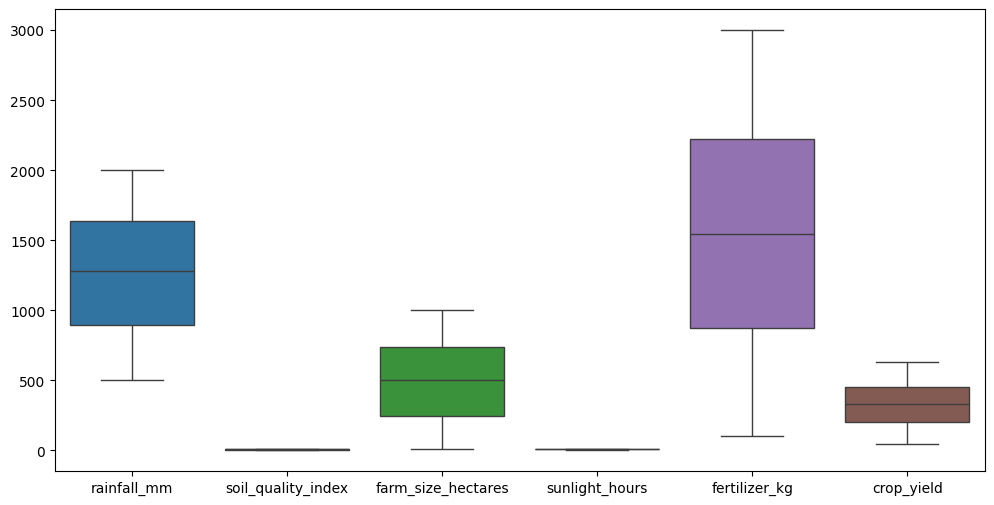

In [11]:
#Creating a box plot to see the number of outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data, ax=ax)
plt.savefig('boxplot.png')
plt.show()

since this dataset is very clean there are no outliers here. But this boxplot helps in finding oultiers.

**To remove outliers for a column**

<Axes: >

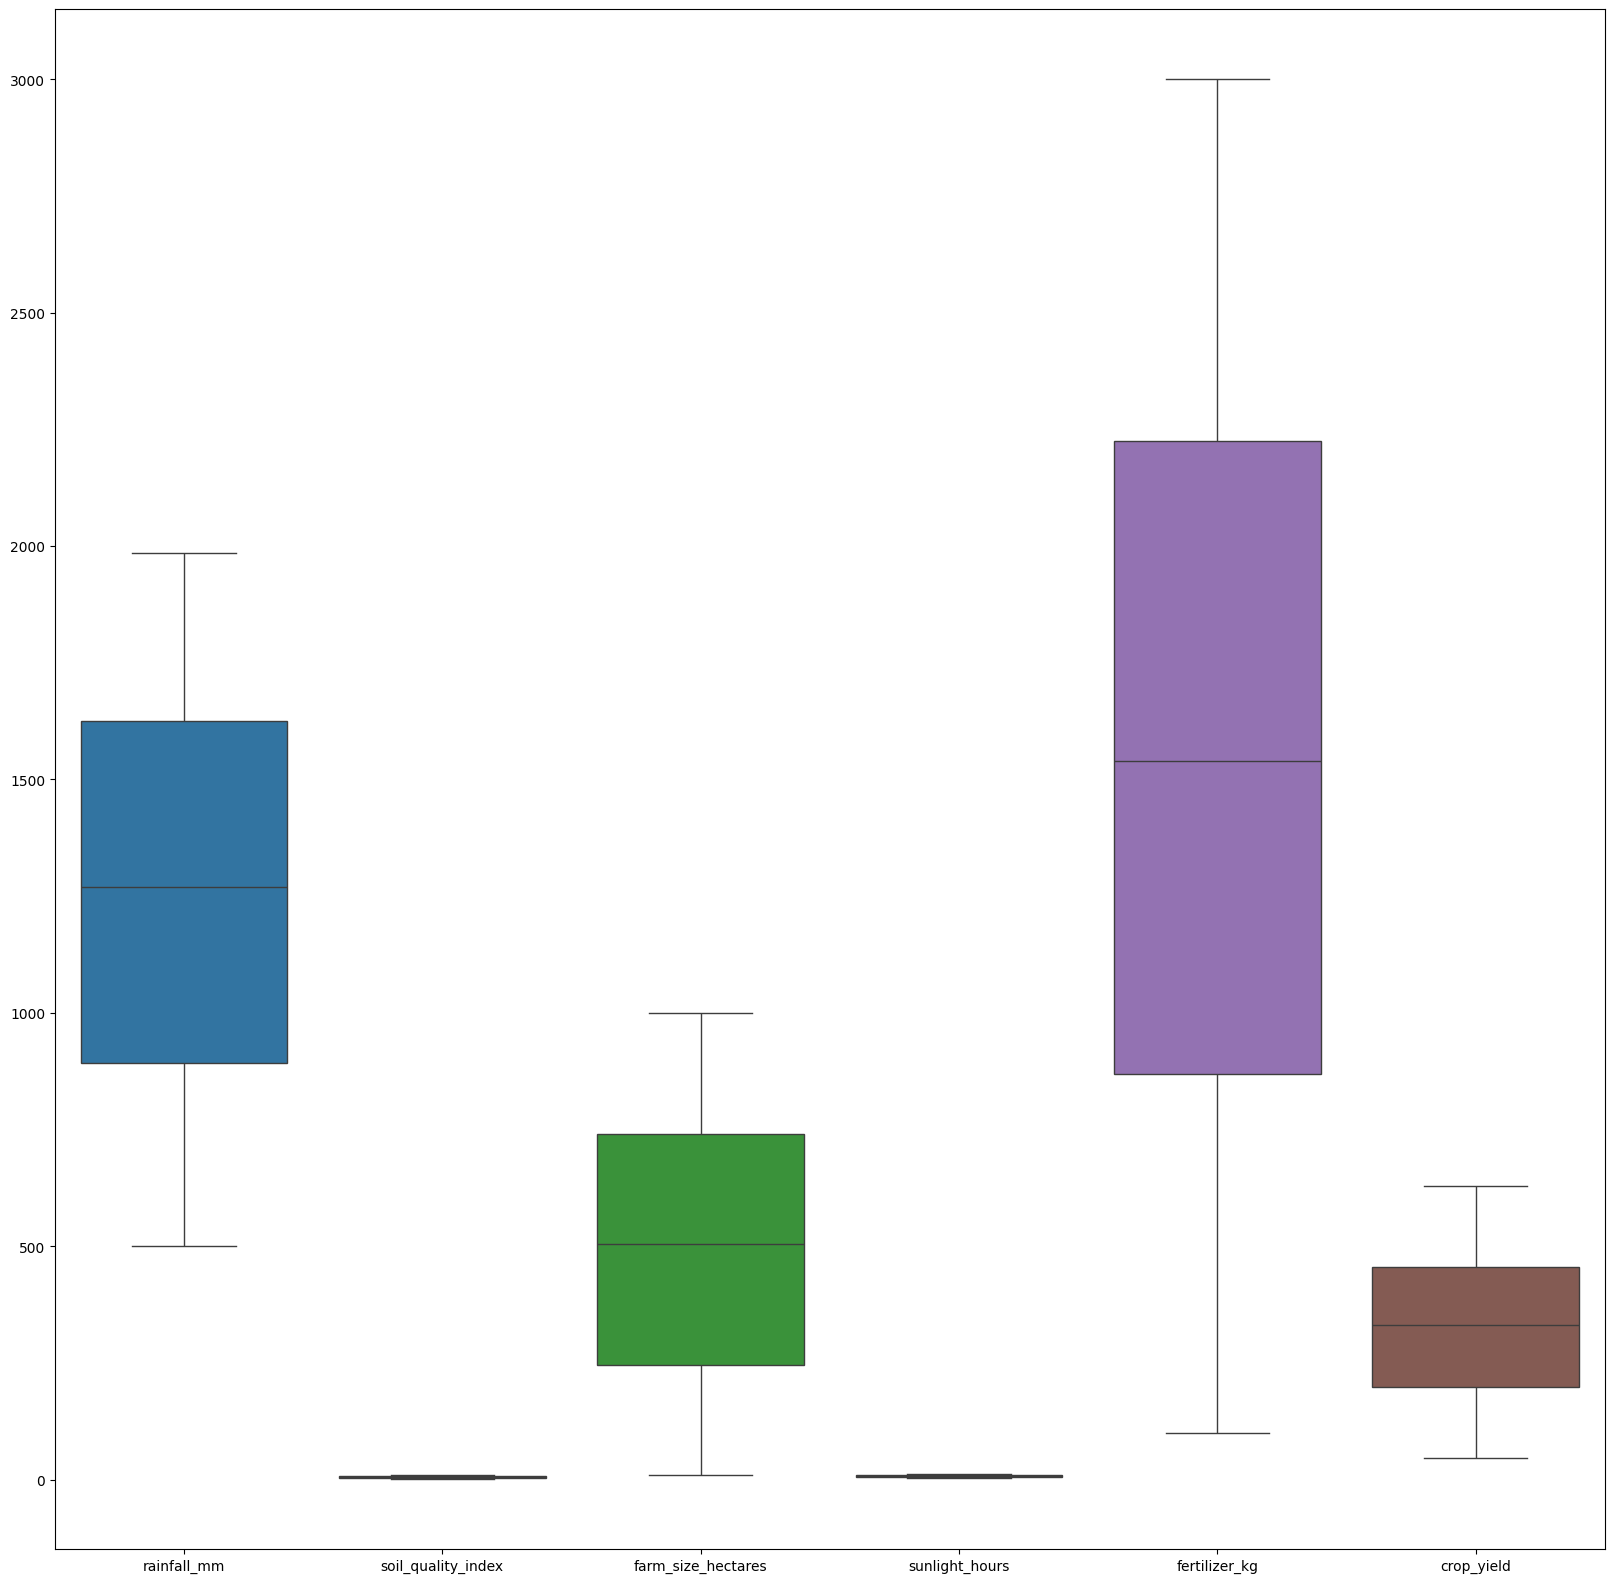

In [12]:
q = data['rainfall_mm'].quantile(0.99)  #Computes the 99th percentile of the "rainfall_mm" column. This helps in identifying and removing extreme values beyond this threshold.
newData = data[data['rainfall_mm'] < q]  #Filters the dataset to exclude values above the 99th percentile.
fig, ax = plt.subplots(figsize=(20,20))   #Creates a figure (fig) and axes (ax) for plotting, with a large figure size of 20x20.
sns.boxplot(data=newData, ax=ax)         # Uses Seaborn's boxplot() function to visualize the distribution of the "BloodPressure" column after filtering.

**To remove outliers from all columns** normally we can remove

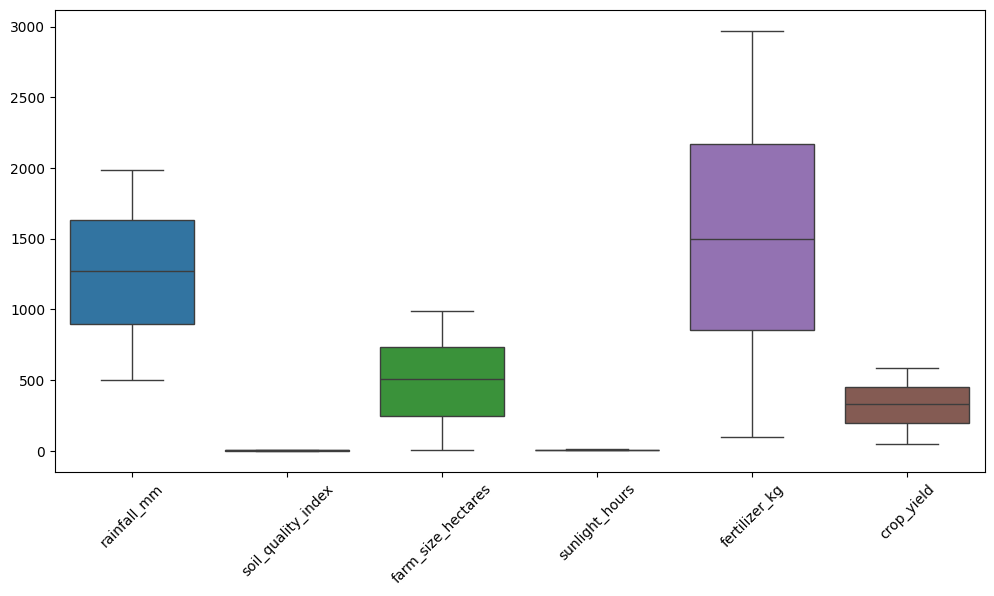

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming 'data' is your DataFrame
filtered_data = data.copy()  # Create a copy of the dataset

# Apply 99th percentile filtering to all numerical columns
for col in data.select_dtypes(include=['number']).columns:
    q = data[col].quantile(0.99)  # Compute 99th percentile
    filtered_data = filtered_data[filtered_data[col] < q]  # Remove extreme values

# Plot the boxplot for the filtered dataset
fig, ax = plt.subplots(figsize=(12,6))  # Adjust figure size
sns.boxplot(data=filtered_data, ax=ax)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


**Correlation Coefficient Heatmap-Feature selection Technique**

In [14]:
print(data.corr())

                    rainfall_mm  soil_quality_index  farm_size_hectares  \
rainfall_mm            1.000000           -0.022198            0.001127   
soil_quality_index    -0.022198            1.000000            0.005829   
farm_size_hectares     0.001127            0.005829            1.000000   
sunlight_hours        -0.005250            0.002187           -0.010054   
fertilizer_kg         -0.029317            0.007254           -0.008032   
crop_yield             0.086339            0.043990            0.989201   

                    sunlight_hours  fertilizer_kg  crop_yield  
rainfall_mm              -0.005250      -0.029317    0.086339  
soil_quality_index        0.002187       0.007254    0.043990  
farm_size_hectares       -0.010054      -0.008032    0.989201  
sunlight_hours            1.000000       0.016289   -0.006792  
fertilizer_kg             0.016289       1.000000    0.102023  
crop_yield               -0.006792       0.102023    1.000000  


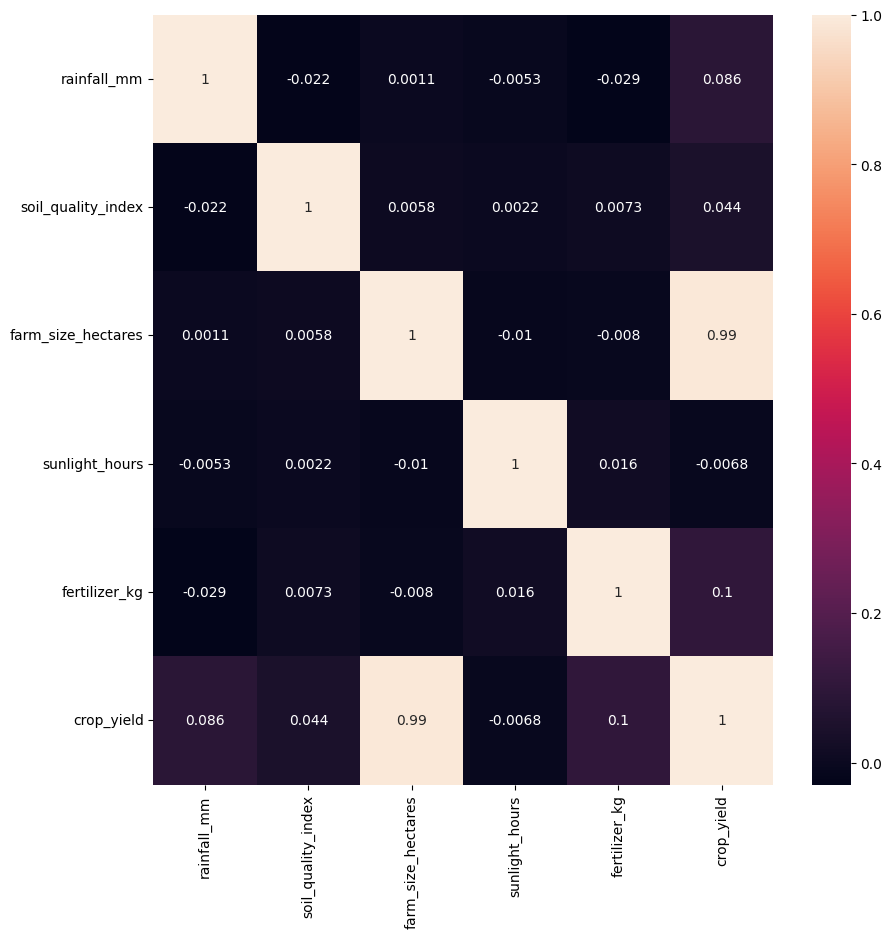

In [15]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(data.corr(),annot=True)
plt.savefig('heatmap.png')
plt.show()

In [16]:
x=data[['rainfall_mm','soil_quality_index','farm_size_hectares','sunlight_hours','fertilizer_kg']]
y=data['crop_yield']

**Look at the dataset some of the columns has small numerical values and other columns have large numerical values(rainfall_mm,	soil_quality_index and other columns). This can cause biasedness in my model in order to AVOID that its good to do "standardization by using Min Max scalar or StandardScalar". THIS IS PART OF EDA data preprocessing**

**i have Split the data into training and testing sets**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

**Scaling the features**

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train) #In fit_transform(x_train), fit() computes the mean and standard deviation of x_train, transform() then scales x_train using these computed values.
#This above line ensures that x_train is standardized properly.
x_test=scaler.transform(x_test) #transform(x_test) Uses the same mean and standard deviation from x_train to scale x_test.
#Does NOT recompute mean & std from x_test (which prevents data leakage).
#Ensures that x_train and x_test follow the same distribution, making model predictions meaningful.

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(x_test)

In [25]:
y_pred

array([513.63581055,  86.50525359, 154.80282615, 404.31656762,
       150.34988207, 424.74444232, 428.70424902, 366.1626022 ,
       438.53131278, 312.23552012, 184.70610154, 227.40545083,
       128.46000461, 211.12597443, 307.92150411, 201.21873644,
       447.86666269, 355.67853679, 381.60960077, 288.96786404,
       470.88544154,  95.95867052, 139.0098859 , 203.76716667,
        95.69289458, 135.5984659 , 419.804279  , 250.32132096,
       468.34809341, 593.0125525 ,  97.10853376, 216.46040827,
       217.64386546, 270.65028432, 512.00373855, 384.08161193,
       296.21894695, 389.84818654, 505.47839633, 330.91859681,
       388.88264321, 387.98461495, 530.65718854, 203.38533333,
       372.36970958, 317.90727844, 184.52920871, 374.49410676,
       255.58403096, 311.18174909, 114.74516303, 197.02060975,
       190.94081559, 242.16737444, 226.57240124, 416.85188771,
       594.84227122, 273.44646543, 220.51276575, 477.44322307,
       361.33908117, 163.54663159,  96.87359896, 252.92

In [33]:
pd.DataFrame({"Actual_vlaues":y_test,"Predicted_values":y_pred})

,Actual_vlaues,Predicted_values
1505,514,513.635811
373,86,86.505254
1732,155,154.802826
2042,404,404.316568
994,150,150.349882
...,...,...
1594,257,256.686906
514,254,253.842848
485,176,176.197807
2734,394,394.059455


**r2 score**

1.   R-squared is a statistical measure that shows how well a model fits data.
2.   It's also known as the coefficient of determination.
3. R-squared values range from 0 to 1, where 0 means the model doesn't predict the outcome, and 1 means the model perfectly predicts the outcome.

In [34]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_pred)
print(r_squared)

0.9999957026269648


**This means that the independent variables (the input features) do a really good job of predicting or explaining the dependent variable (the output).**

**Breaking it down:**

*   The dependent variable is what we are trying to predict (e.g., house price).
*   The independent variables are the factors that influence it (e.g., house size, number of bedrooms, location).
*   90% variance explained means that 90% of the changes in the dependent variable are due to the independent variables we used.
*   The remaining 10% is due to other factors we didn’t include or random noise.

In [35]:
model.coef_

array([ 12.91317724,   5.73843727, 143.94462559,   0.25133795,
        16.14697323])

In [36]:
model.intercept_

327.94666666666666

 types of regression:
1. Linear regression
2. Logistic regression (for binary classification)
3. Ridge and lasso regression (To tackle overfitting)
4. Polynomial regression (where independent variables are non linear)